### Tensorflow 

Chúng ta sẽ xây dựng mô hình Skip-Gram bằng Tensorflow

### Skip-Gram 

Dữ liệu sử dụng sẽ là tập [BBC news dataset](https://raw.githubusercontent.com/susanli2016/PyCon-Canada-2019-NLP-Tutorial/master/bbc-text.csv)

Chúng ta sẽ tiến hành tải dữ lệu và xử lý dữ liệu

In [ ]:
! nvidia-smi

Tue Sep  8 11:09:48 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.66       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P0    27W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
! pip3 install wget

In [ ]:
import pandas as pd
from time import time 
import wget
import os 
import re, string
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
import numpy as np
from collections import defaultdict

In [ ]:
# Nếu chưa có các package của nltk, tiến hành download
import nltk
nltk.download('punkt')
nltk.download('brown')
nltk.download('stopwords')
nltk.download('names')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('universal_tagset')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package names to /root/nltk_data...
[nltk_data]   Package names is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!


True

In [ ]:
STOPWORDS = set(stopwords.words('english'))

In [ ]:
# Tiến hành kiểm tra để tải dữ liệu 
url = 'https://raw.githubusercontent.com/susanli2016/PyCon-Canada-2019-NLP-Tutorial/master/bbc-text.csv'
if not os.path.exists('bbc-text.csv'):
  wget.download(url)
  print("Download completed !")

In [ ]:
df = pd.read_csv('bbc-text.csv')

In [ ]:
df.head()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


In [ ]:
# Xây dựng hàm làm sạch dữ liệu, loại bỏ các dấu câu, số và chuyển thành chữ thường, stop words

def clean_text(text):
  text = text.lower()
  text = re.sub(r'\[.*?\]', '', text)
  text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)
  text = re.sub(r'\w*\d\w*', '', text)

  clean_text = ' '.join(word for word in text.split() if word not in STOPWORDS)

  # Loại bỏ những câu có ít hơn 3 từ
  if len(clean_text) > 2:
    return clean_text

In [ ]:
df_clean = pd.DataFrame(df.text.apply(lambda x: clean_text(x)))
df_clean.head()

,text
0,tv future hands viewers home theatre systems p...
1,worldcom boss left books alone former worldcom...
2,tigers wary farrell gamble leicester say rushe...
3,yeading face newcastle fa cup premiership side...
4,ocean twelve raids box office ocean twelve cri...


In [ ]:
# Lemmatization: Chuyển các biến thể của các từ về thành dạng gốc 
from nltk.stem import WordNetLemmatizer

wordnet_lemmatizer = WordNetLemmatizer()
lemmatize_words = np.vectorize(wordnet_lemmatizer.lemmatize)

def Lemmatization(text):
  words = lemmatize_words(word_tokenize(text))
  lemmatize_text = ' '.join(words)
  return lemmatize_text


In [ ]:
df_clean["text_lemmatize"] =  df_clean.apply(lambda x: Lemmatization(x['text']), axis=1)

In [ ]:
df_clean.head()

,text,text_lemmatize
0,tv future hands viewers home theatre systems p...,tv future hand viewer home theatre system plas...
1,worldcom boss left books alone former worldcom...,worldcom bos left book alone former worldcom b...
2,tigers wary farrell gamble leicester say rushe...,tiger wary farrell gamble leicester say rushed...
3,yeading face newcastle fa cup premiership side...,yeading face newcastle fa cup premiership side...
4,ocean twelve raids box office ocean twelve cri...,ocean twelve raid box office ocean twelve crim...


In [ ]:
df_clean['text_lemmatize_clean'] = df_clean['text_lemmatize'].str.replace('-PRON-', '')

In [ ]:
sentences = [row.split() for row in df_clean['text_lemmatize_clean']]
word_freq = defaultdict(int)
for sent in sentences:
    for i in sent:
        word_freq[i] += 1

print(list(word_freq)[:10])

['tv', 'future', 'hand', 'viewer', 'home', 'theatre', 'system', 'plasma', 'highdefinition', 'digital']


In [ ]:
word_list = sorted(word_freq.keys(), key=word_freq.get, reverse=True)

In [ ]:
print(word_list)

['said', 'mr', 'year', 'would', 'also', 'people', 'new', 'u', 'one', 'could', 'game', 'time', '£', 'last', 'first', 'say', 'world', 'government', 'two', 'film', 'company', 'uk', 'make', 'firm', 'get', 'best', 'told', 'number', 'service', 'like', 'take', 'made', 'way', 'music', 'month', 'many', 'country', 'player', 'market', 'back', 'labour', 'week', 'next', 'party', 'bbc', 'set', 'show', 'three', 'minister', 'want', 'sale', 'added', 'home', 'well', 'win', 'election', 'good', 'plan', 'go', 'work', 'may', 'million', 'day', 'technology', 'right', 'come', 'think', 'second', 'mobile', 'play', 'group', 'still', 'going', 'part', 'england', 'much', 'since', 'see', 'phone', 'blair', 'award', 'use', 'report', 'need', 'top', 'public', 'system', 'tax', 'european', 'british', 'used', 'tv', 'news', 'however', 'end', 'tory', 'share', 'price', 'put', 'even', 'record', 'expected', 'bank', 'director', 'business', 'five', 'deal', 'economy', 'place', 'user', 'already', 'cost', 'brown', 'chief', 'problem',

Xây dựng chương trình Skip-Gram bằng Tensorflow

In [ ]:
import tensorflow as tf 
import tensorflow.keras as keras
from tensorflow.keras.models import Model 
from tensorflow.keras.layers import Dense, Embedding, Reshape, Activation, Dot
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import skipgrams
from tqdm import tqdm

In [ ]:
class Skip_gram(Model):
  def __init__(self, voc_size, embed_size):
    super(Skip_gram, self).__init__()
    self.embedding = Embedding(voc_size, embed_size)
    self.output_layer = Embedding(voc_size, embed_size)

  def call(self, input):
    w = self.embedding(input[0])
    c = self.output_layer(input[1])
    x = Dot(axes=2)([w, c])
    x = Reshape((1, ), input_shape=(1, 1))(x)
    out = Activation('sigmoid')(x)

    return out    

  def summary(self):
    x = tf.keras.layers.Input(shape=(2, ))
    y = tf.keras.layers.Input(shape=(1, ))
    return Model(inputs=[x], outputs=self.call([x, y]))


In [ ]:
def text2sequences():
  sentence_vectors = list()
  for sent in sentences:
    sentence_vectors.append(list(word_list.index(i) for i in sent))

  return sentence_vectors

In [ ]:
data_train = text2sequences()

In [ ]:
print(data_train[0])

[91, 168, 500, 942, 52, 973, 86, 4495, 1192, 91, 143, 190, 2210, 1277, 1193, 1254, 32, 5, 846, 91, 5603, 326, 105, 2, 11, 137, 802, 1161, 2211, 559, 155, 1154, 46, 1214, 2707, 1535, 6, 63, 736, 8, 678, 11030, 7, 643, 1116, 205, 403, 1769, 942, 751, 52, 145, 1140, 1805, 1102, 20, 338, 28, 1492, 829, 1254, 989, 286, 8, 17340, 63, 2261, 143, 362, 190, 2210, 7606, 4998, 3828, 516, 29, 7, 4999, 21, 1255, 86, 442, 5, 100, 788, 69, 3968, 459, 4135, 91, 205, 49, 5604, 63, 1869, 75, 7607, 91, 4, 3969, 1192, 91, 45, 150, 104, 413, 7, 2644, 30, 147, 1057, 1192, 3829, 5, 459, 4135, 2049, 4, 2352, 13142, 145, 752, 2793, 1229, 595, 17341, 731, 7, 145, 1140, 1805, 20, 1698, 167, 371, 1843, 687, 53, 953, 2094, 942, 4717, 752, 252, 7, 287, 63, 593, 4, 404, 1024, 147, 763, 606, 7608, 28, 29, 1255, 1621, 435, 77, 960, 34, 2, 11, 21, 2050, 17342, 44, 990, 11031, 26, 44, 92, 191, 29, 44, 119, 243, 1843, 687, 342, 4718, 119, 593, 1046, 21, 1511, 953, 4717, 284, 714, 1103, 403, 953, 394, 145, 953, 0, 1178, 1

In [ ]:
voc_size = len(word_freq)
model = Skip_gram(voc_size=voc_size, embed_size=300)
model.compile(optimizer=tf.optimizers.Adam(lr=1e-3), loss='binary_crossentropy')

In [24]:
for epoch in range(10):
  loss = 0
  start_time = time()
  t = tqdm(len(data_train))
  print('Epoch')
  for i, sentence in enumerate(data_train):
    data, labels = skipgrams(sequence=sentence, vocabulary_size=voc_size, window_size=4)
    x = [np.array(x) for x in zip(*data)]
    y = np.array(labels, dtype=np.int32)
    loss += model.train_on_batch(x, y)
  print('Epoch:', epoch, '\tLoss:', loss, 'Time:', time() - start_time)

0it [00:00, ?it/s]

Epoch



0it [00:00, ?it/s]

Epoch: 0 	Loss: 1064.966119915247 Time: 342.7189702987671
Epoch




0it [00:00, ?it/s]

Epoch: 1 	Loss: 836.6207430660725 Time: 342.2848525047302
Epoch





0it [00:00, ?it/s]

Epoch: 2 	Loss: 773.6746117174625 Time: 339.98491191864014
Epoch






0it [00:00, ?it/s]

Epoch: 3 	Loss: 713.5785595178604 Time: 339.0937657356262
Epoch







0it [00:00, ?it/s]

Epoch: 4 	Loss: 649.3735534399748 Time: 339.13155794143677
Epoch








0it [00:00, ?it/s]

Epoch: 5 	Loss: 587.0906994640827 Time: 338.8784339427948
Epoch









0it [00:00, ?it/s]

Epoch: 6 	Loss: 530.5385148972273 Time: 337.8012545108795
Epoch










0it [00:00, ?it/s]

Epoch: 7 	Loss: 483.38386957347393 Time: 339.6682686805725
Epoch











0it [00:00, ?it/s]

Epoch: 8 	Loss: 444.5930235683918 Time: 341.40437150001526
Epoch
Epoch: 9 	Loss: 414.47799177467823 Time: 344.54740142822266


In [25]:
# Lưu model
import gensim 

weight = model.get_weights()[0]

with open('skip-gram.txt', 'w', encoding='utf8') as file:
  file.write('{} {}\n'.format(voc_size-1, 300))
  for i, token in enumerate(word_list):
    file.write('{} {}\n'.format(token, ' '.join(map(str, list(weight[i, :]))))) 
  file.close() 

In [26]:
# Loading model
w2v = gensim.models.KeyedVectors.load_word2vec_format('skip-gram.txt', binary=False)

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:254: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [27]:
# Kiểm tra những giống nghĩa với từ system
w2v.most_similar(positive=['system'])

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('exeem', 0.4688798785209656),
 ('fearsomely', 0.4516056776046753),
 ('steamtype', 0.44692787528038025),
 ('theorem', 0.4379701614379883),
 ('cluttered', 0.4374411106109619),
 ('ati', 0.43298476934432983),
 ('godel', 0.4286433458328247),
 ('scammer', 0.422561377286911),
 ('athlon', 0.4133744239807129),
 ('fourtier', 0.4127255082130432)]

In [28]:
# Kiểm tra mức độ giống nhau giữa từ company và business
w2v.wv.similarity('company', 'business')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


0.1103747

In [31]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt


def tsne_plot(model):
    "Create TSNE model and plot it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(18, 18)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  # Remove the CWD from sys.path while we load stuff.


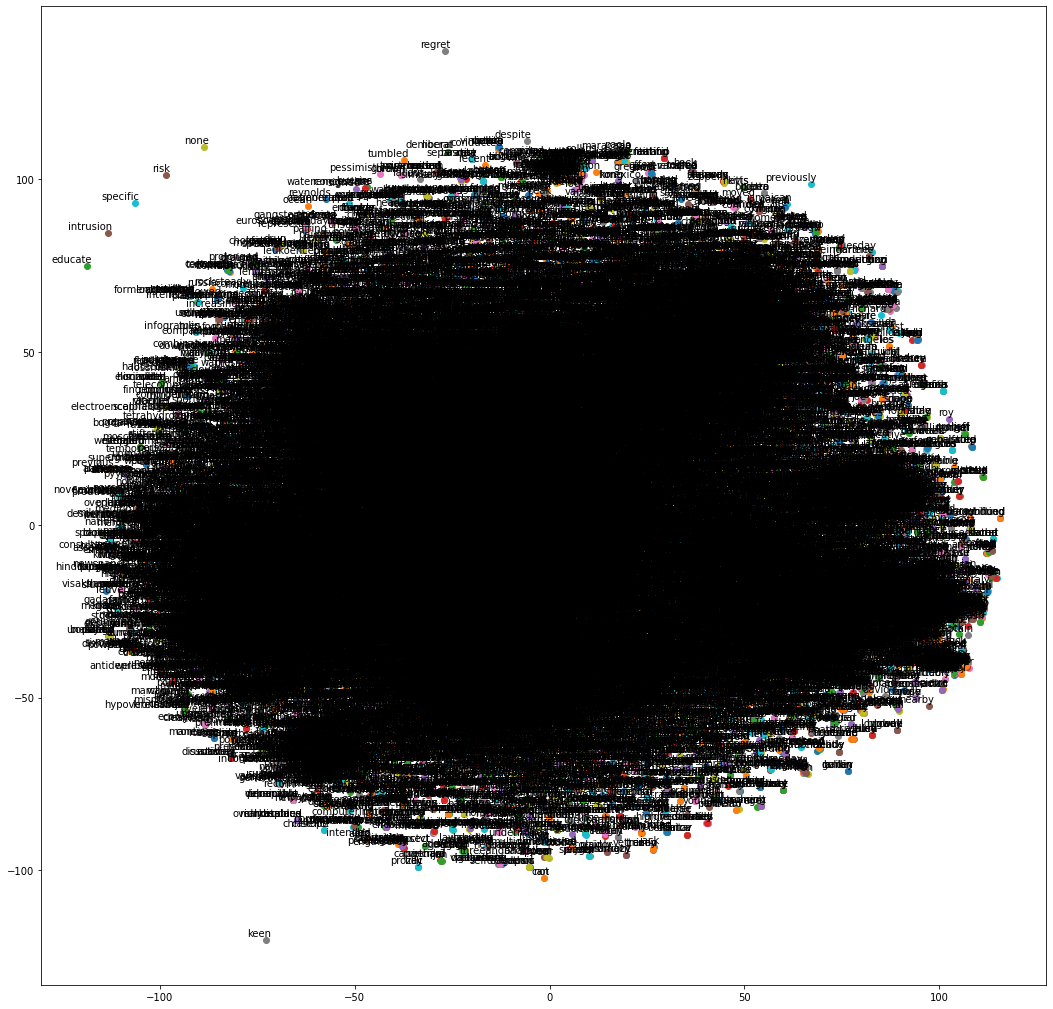

In [32]:
tsne_plot(w2v)